<a href="https://colab.research.google.com/github/maxstclair/DS4002/blob/main/Word_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MI3 script containing code for finding key words in the sentiment analysis.

Set up

In [1]:
! git clone https://github.com/maxstclair/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 518, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 518 (delta 13), reused 3 (delta 3), pack-reused 485 (from 2)
Receiving objects: 100% (518/518), 2.79 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/DS4002/Project_1/DATA/final_restaurant_df.csv')
df.head()

,Unnamed: 0,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Date,Rating,Message,Author Reviews,Restaurant,sentiment,DayOfWeek
0,2023-02-19,5.0,This place was better than the 3 Michelin-star...,82.0,Black Cow,0.9965,Sunday
1,2023-02-19,5.0,"I have to say, this place is a steakhouse like...",113.0,Black Cow,0.9674,Sunday
2,2023-02-26,5.0,Loved this place! They were completely booked ...,28.0,Black Cow,0.9937,Sunday
3,2023-05-03,4.0,"Food is excellent, best steak in a very long t...",24.0,Black Cow,0.7604,Wednesday
4,2023-08-03,5.0,The food here is incredible! The service was e...,23.0,Black Cow,0.9845,Thursday


Finding key words using sentiment analysis

In [44]:
!pip install nltk
!pip install contractions
import nltk

nltk.download('punkt_tab')
nltk.download("vader_lexicon")

from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
# organizing reviews into positive and negative categories
positive_reviews = pd.DataFrame(df[df['sentiment'] > 0.05])
negative_reviews = pd.DataFrame(df[df['sentiment'] < -0.05])

In [46]:
# eliminate filler words (and, my, i, but, etc.) from reviews
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# fix contractions (don't, etc.)
def fix_contractions(text):
  text = str(text)
  return contractions.fix(text)

# update dataframes
positive_reviews['Message'] = positive_reviews['Message'].apply(fix_contractions)
negative_reviews['Message'] = negative_reviews['Message'].apply(fix_contractions)

In [61]:
# extract most popular words
def words(reviews, n=25):
  all_words = []
  for review in reviews:
    words = word_tokenize(review.lower())
    filtered_words = [
        word for word in words if word not in stop_words
        and len(word) > 2]
    all_words.extend(filtered_words)

  common_words = Counter(all_words).most_common(n)
  return common_words

In [62]:
# create positive and negative key word lists of 25 words
positive_words = words(positive_reviews['Message'], n=25)
negative_words = words(negative_reviews['Message'], n=25)

In [63]:
# show new word lists
print("common positive words:", positive_words)
print("common negative words:", negative_words)

common positive words: [('food', 1760), ('great', 1437), ('good', 1407), ('service', 980), ('place', 927), ('would', 892), ('delicious', 789), ('restaurant', 740), ('like', 694), ('also', 689), ('really', 670), ('one', 657), ('ordered', 638), ('time', 617), ('back', 610), ('got', 609), ('menu', 587), ('nice', 543), ('well', 542), ('came', 521), ('get', 521), ('definitely', 517), ('amazing', 513), ('charlottesville', 495), ('best', 481)]
common negative words: [('food', 156), ('service', 97), ('would', 82), ('restaurant', 65), ('good', 63), ('order', 62), ('table', 61), ('one', 59), ('time', 54), ('ordered', 51), ('back', 49), ('place', 48), ('like', 47), ('got', 42), ('minutes', 42), ('never', 42), ('asked', 37), ('...', 34), ('two', 32), ('get', 32), ('said', 32), ('great', 32), ('people', 32), ('came', 30), ('menu', 30)]


Visualize as word cloud

In [64]:
from wordcloud import WordCloud

In [65]:
# creating the word cloud
def wordcloud(words):
  words = dict(words)
  image = WordCloud(background_color='white').generate_from_frequencies(words)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

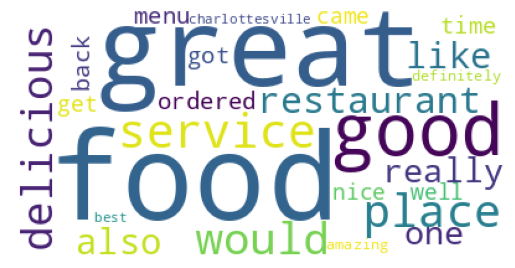

In [66]:
# positive reviews
wordcloud(positive_words)

observations: emphasis on descriptive words like great, good, delicious

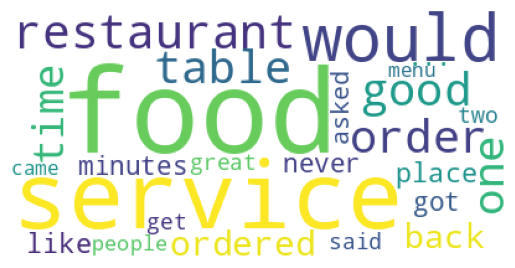

In [67]:
# negative reviews
wordcloud(negative_words)

observations: emphasis on factors involved like food, service, time, table, restaurant